## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import requests
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
from datetime import datetime
from sklearn.model_selection import train_test_split

## Download arquivos de dados

In [2]:
# muda o diretório para a pasta "raw_data"
current_dir_orig = os.getcwd()
os.chdir(f"{current_dir_orig}/raw_data")

In [3]:
def download_files(zipp):
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    
    for file_name, url in zipp:
        
        download = requests.get(url, headers=headers, stream=True)
        open(f"{file_name}", 'wb').write(download.content)
    

url_prest_contas = 'https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2022.zip'
url_candidatos = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2022.zip'
url_vagas = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_vagas/consulta_vagas_2022.zip'

zipfiles_names = ['prestacao_de_contas_eleitorais_candidatos_2022.zip', 'consulta_cand_2022.zip', 'consulta_vagas_2022.zip']
urls = [url_prest_contas, url_candidatos, url_vagas]

current_dir = os.getcwd()

# criterio para fazer download apenas uma vez
if len(os.listdir(current_dir)) == 0:
    download_files(zip(zipfiles_names, urls))
else:
    pass


## Descompacta e importa dados

In [4]:
files = os.listdir(current_dir)

zip_list = [zipfile.ZipFile(file) for file in files]

candidatos_relevant_files = ['consulta_cand_2022_BRASIL.csv']
vagas_relevant_files = ['consulta_vagas_2022_BRASIL.csv']
prestcontas_relevant_files = ['receitas_candidatos_2022_BRASIL.csv', 'despesas_contratadas_candidatos_2022_BRASIL.csv']


In [5]:
# colunas de interesse em cada arquivo

cols_candidatos = ['ANO_ELEICAO',
                   'DS_ELEICAO',
                   'SG_UE',
                   'DS_CARGO',
                   'SQ_CANDIDATO',
                   'NR_CANDIDATO',
                   'NM_CANDIDATO',
                   'NR_PARTIDO',
                   'SG_PARTIDO',
                   'NM_PARTIDO',
                   'DS_NACIONALIDADE',
                   'NR_IDADE_DATA_POSSE',
                   'DS_GENERO',
                   'DS_GRAU_INSTRUCAO',
                   'DS_ESTADO_CIVIL',
                   'DS_COR_RACA',
                   'DS_OCUPACAO',
                   'ST_CANDIDATO_INSERIDO_URNA',
                   'ST_REELEICAO'
                   ]

cols_vagas = ['ANO_ELEICAO',
              'DS_ELEICAO',
              'SG_UE',
              'DS_CARGO',
              'QT_VAGAS'
             ]


cols_receitas = ['ANO_ELEICAO',
               'DS_ELEICAO',
               'TP_PRESTACAO_CONTAS',
               'SQ_PRESTADOR_CONTAS',
               'SG_UE',
               'NR_CNPJ_PRESTADOR_CONTA',
               'DS_CARGO',
               'SQ_CANDIDATO',
               'NR_CANDIDATO',
               'NM_CANDIDATO',
               'NR_PARTIDO',
               'SG_PARTIDO',
               'NM_PARTIDO',
               'DS_FONTE_RECEITA',
               'DS_ORIGEM_RECEITA',
               'DS_ESPECIE_RECEITA',
               'NR_CPF_CNPJ_DOADOR',
               'NM_DOADOR_RFB',
               'DT_RECEITA',
               'VR_RECEITA'
               ]

cols_despesas = ['ANO_ELEICAO',
                'DS_ELEICAO',
                'TP_PRESTACAO_CONTAS',
                'SQ_PRESTADOR_CONTAS',
                'SG_UE',
                'NR_CNPJ_PRESTADOR_CONTA',
                'DS_CARGO',
                'SQ_CANDIDATO',
                'NR_CANDIDATO',
                'NM_CANDIDATO',
                'NR_PARTIDO',
                'SG_PARTIDO',
                'NM_PARTIDO',
                'DS_TIPO_FORNECEDOR',
                'NR_CPF_CNPJ_FORNECEDOR',
                'NM_FORNECEDOR_RFB',
                'DS_ORIGEM_DESPESA',
                'DT_DESPESA',
                'VR_DESPESA_CONTRATADA'
               ]

cols_eleitos = ['ds_cargo',
                 'nr_candidato',
                 'nm_candidato',
                 'sg_partido',
                 'sg_ue',
                 'sq_candidato',
                 'qt_votos_nom_validos'
                ]


candidatos_df = pd.read_csv(zip_list[0].open(candidatos_relevant_files[0]),
                            sep = ';',
                            usecols = cols_candidatos,
                            encoding = 'windows-1252'
                            )

vagas_df = pd.read_csv(zip_list[1].open(vagas_relevant_files[0]),
                       sep = ';',
                       usecols = cols_vagas,
                       encoding = 'windows-1252'
                       )

receitas_df = pd.read_csv(zip_list[2].open(prestcontas_relevant_files[0]),
                        sep = ';',
                        usecols = cols_receitas,
                        encoding = 'windows-1252'
                        )

despesas_df = pd.read_csv(zip_list[2].open(prestcontas_relevant_files[1]),
                         sep = ';',
                         usecols = cols_despesas,
                         encoding = 'windows-1252'
                         )

# muda para o diretório original
os.chdir(current_dir_orig)

eleitos_df = pd.read_csv(r'./support_files/eleitas_eleitos-região_presidente_2022.csv',
                          sep = ';',
                          usecols = cols_eleitos,
                          encoding = 'windows-1252'
                          )


## Checagem conteúdo dos arquivos

In [6]:
# display de todas as colunas
pd.set_option('display.max_columns', None)

In [7]:
candidatos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ANO_ELEICAO                 29314 non-null  int64  
 1   DS_ELEICAO                  29314 non-null  object 
 2   SG_UE                       29314 non-null  object 
 3   DS_CARGO                    29314 non-null  object 
 4   SQ_CANDIDATO                29314 non-null  int64  
 5   NR_CANDIDATO                29314 non-null  int64  
 6   NM_CANDIDATO                29314 non-null  object 
 7   NR_PARTIDO                  29314 non-null  int64  
 8   SG_PARTIDO                  29314 non-null  object 
 9   NM_PARTIDO                  29314 non-null  object 
 10  DS_NACIONALIDADE            29314 non-null  object 
 11  NR_IDADE_DATA_POSSE         29289 non-null  float64
 12  DS_GENERO                   29314 non-null  object 
 13  DS_GRAU_INSTRUCAO           293

In [8]:
candidatos_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,ST_CANDIDATO_INSERIDO_URNA
0,2022,Eleições Gerais Estaduais 2022,DF,DEPUTADO FEDERAL,70001650385,1123,CELY LANGAMER MUNIZ,11,PP,PROGRESSISTAS,BRASILEIRA NATA,51.0,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS,N,SIM
1,2022,Eleições Gerais Estaduais 2022,PE,DEPUTADO FEDERAL,170001618619,1167,MARCOS BEZERRA CAMPELO,11,PP,PROGRESSISTAS,BRASILEIRA NATA,55.0,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,N,SIM
2,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO ESTADUAL,220001647615,35355,DIHESSICA DAYANE FERREIRA DA SILVA,35,PMB,PARTIDO DA MULHER BRASILEIRA,BRASILEIRA NATA,25.0,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,N,SIM
3,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO FEDERAL,220001605554,4456,MARY TERESINHA BRAGANHOL,44,UNIÃO,UNIÃO BRASIL,BRASILEIRA NATA,58.0,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,N,SIM
4,2022,Eleições Gerais Estaduais 2022,RJ,DEPUTADO ESTADUAL,190001613885,33337,ROBERTA PATRÍCIA DA SILVA ALMEIDA,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,BRASILEIRA NATA,47.0,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,DONA DE CASA,N,SIM


In [9]:
vagas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ANO_ELEICAO  109 non-null    int64 
 1   DS_ELEICAO   109 non-null    object
 2   SG_UE        109 non-null    object
 3   DS_CARGO     109 non-null    object
 4   QT_VAGAS     109 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.4+ KB


In [10]:
vagas_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,QT_VAGAS
0,2022,Eleição Geral Federal 2022,BR,Presidente,1
1,2022,Eleições Gerais Estaduais 2022,AL,Governador,1
2,2022,Eleições Gerais Estaduais 2022,AL,Senador,1
3,2022,Eleições Gerais Estaduais 2022,AL,Deputado Federal,9
4,2022,Eleições Gerais Estaduais 2022,AL,Deputado Estadual,27


In [11]:
receitas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653273 entries, 0 to 653272
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ANO_ELEICAO              653273 non-null  int64 
 1   DS_ELEICAO               653273 non-null  object
 2   TP_PRESTACAO_CONTAS      653273 non-null  object
 3   SQ_PRESTADOR_CONTAS      653273 non-null  int64 
 4   SG_UE                    653273 non-null  object
 5   NR_CNPJ_PRESTADOR_CONTA  653273 non-null  int64 
 6   DS_CARGO                 653273 non-null  object
 7   SQ_CANDIDATO             653273 non-null  int64 
 8   NR_CANDIDATO             653273 non-null  int64 
 9   NM_CANDIDATO             653273 non-null  object
 10  NR_PARTIDO               653273 non-null  int64 
 11  SG_PARTIDO               653273 non-null  object
 12  NM_PARTIDO               653273 non-null  object
 13  DS_FONTE_RECEITA         653273 non-null  object
 14  DS_ORIGEM_RECEITA   

In [12]:
print(receitas_df.shape)
receitas_df.head()

(653273, 20)


,ANO_ELEICAO,DS_ELEICAO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_ESPECIE_RECEITA,NR_CPF_CNPJ_DOADOR,NM_DOADOR_RFB,DT_RECEITA,VR_RECEITA
0,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3796037695,SP,47552212000145,Deputado Federal,250001651724,4427,REINALDO MONTEIRO DA SILVA,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,16653258874,REINALDO MONTEIRO DA SILVA,29/08/2022,"461,75"
1,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3796037695,SP,47552212000145,Deputado Federal,250001651724,4427,REINALDO MONTEIRO DA SILVA,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,16653258874,REINALDO MONTEIRO DA SILVA,22/08/2022,"187,30"
2,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3785019283,SC,47497189000133,Deputado Estadual,240001616209,44117,MARIA CRISTINA CORREA CLEMENTE,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,90908910991,MARIA CRISTINA CORREA CLEMENTE,18/08/2022,"400,00"
3,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3785019283,SC,47497189000133,Deputado Estadual,240001616209,44117,MARIA CRISTINA CORREA CLEMENTE,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,90908910991,MARIA CRISTINA CORREA CLEMENTE,18/08/2022,"200,00"
4,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3778701223,MS,47464846000146,Deputado Federal,120001609244,4444,SINDOLEY LUIZ DE SOUZA MORAIS,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,Transferência eletrônica,97652911168,SINDOLEY LUIZ DE SOUZA MORAIS,09/09/2022,"2511,00"


In [13]:
despesas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994977 entries, 0 to 1994976
Data columns (total 19 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ANO_ELEICAO              int64 
 1   DS_ELEICAO               object
 2   TP_PRESTACAO_CONTAS      object
 3   SQ_PRESTADOR_CONTAS      int64 
 4   SG_UE                    object
 5   NR_CNPJ_PRESTADOR_CONTA  int64 
 6   DS_CARGO                 object
 7   SQ_CANDIDATO             int64 
 8   NR_CANDIDATO             int64 
 9   NM_CANDIDATO             object
 10  NR_PARTIDO               int64 
 11  SG_PARTIDO               object
 12  NM_PARTIDO               object
 13  DS_TIPO_FORNECEDOR       object
 14  NR_CPF_CNPJ_FORNECEDOR   int64 
 15  NM_FORNECEDOR_RFB        object
 16  DS_ORIGEM_DESPESA        object
 17  DT_DESPESA               object
 18  VR_DESPESA_CONTRATADA    object
dtypes: int64(7), object(12)
memory usage: 289.2+ MB


In [14]:
print(despesas_df.shape)
despesas_df.head()

(1994977, 19)


,ANO_ELEICAO,DS_ELEICAO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_TIPO_FORNECEDOR,NR_CPF_CNPJ_FORNECEDOR,NM_FORNECEDOR_RFB,DS_ORIGEM_DESPESA,DT_DESPESA,VR_DESPESA_CONTRATADA
0,2022,Eleições Gerais Estaduais 2022,Final,3793673304,AC,47547980000100,Deputado Federal,10001642333,1515,JESSICA ROJAS SALES,15,MDB,Movimento Democrático Brasileiro,Pessoa Física,65149203220,AMARILIO SARAIVA DE OLIVEIRA,Atividades de militância e mobilização de rua,22/08/2022,"4000,00"
1,2022,Eleições Gerais Estaduais 2022,Final,3783868250,AC,47493579000135,Deputado Federal,10001613550,1331,LEONARDO CUNHA DE BRITO,13,PT,Partido dos Trabalhadores,Pessoa Física,6457176224,IRANILDO MATIAS DOS SANTOS,Atividades de militância e mobilização de rua,03/09/2022,"500,00"
2,2022,Eleições Gerais Estaduais 2022,Final,3783868250,AC,47493579000135,Deputado Federal,10001613550,1331,LEONARDO CUNHA DE BRITO,13,PT,Partido dos Trabalhadores,Pessoa Física,6457176224,IRANILDO MATIAS DOS SANTOS,Atividades de militância e mobilização de rua,03/09/2022,"500,00"
3,2022,Eleições Gerais Estaduais 2022,Final,3783868250,AC,47493579000135,Deputado Federal,10001613550,1331,LEONARDO CUNHA DE BRITO,13,PT,Partido dos Trabalhadores,Pessoa Física,6457176224,IRANILDO MATIAS DOS SANTOS,Atividades de militância e mobilização de rua,03/09/2022,"500,00"
4,2022,Eleições Gerais Estaduais 2022,Final,3791359992,AC,47529158000117,Deputado Estadual,10001635541,10000,JAMYL ASFURY MARTINS OLIVEIRA,10,REPUBLICANOS,REPUBLICANOS,Pessoa Física,1822169267,UEBERTON JUNIOR NAVA DA SILVA,Atividades de militância e mobilização de rua,18/08/2022,"1200,00"


In [15]:
eleitos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds_cargo              513 non-null    object
 1   nr_candidato          513 non-null    int64 
 2   nm_candidato          513 non-null    object
 3   sg_partido            513 non-null    object
 4   sg_ue                 513 non-null    object
 5   sq_candidato          513 non-null    int64 
 6   qt_votos_nom_validos  513 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 28.2+ KB


In [16]:
print(eleitos_df.shape)
eleitos_df.head()

(513, 7)


,ds_cargo,nr_candidato,nm_candidato,sg_partido,sg_ue,sq_candidato,qt_votos_nom_validos
0,Deputado Federal,1101,MARIA DO SOCORRO NERI MEDEIROS DE SOUZA,PP,AC,10001621643,25842
1,Deputado Federal,4455,ROZIMEIRE RIBEIRO ANDRADE,UNIÃO,AC,10001612486,21285
2,Deputado Federal,4422,ULYSSES FREITAS PEREIRA DE ARAUJO,UNIÃO,AC,10001612487,21075
3,Deputado Federal,1122,JOSÉ ESTEPHAN BARBARY FILHO,PP,AC,10001621646,19958
4,Deputado Federal,1111,GEHLEN DINIZ ANDRADE,PP,AC,10001621650,19560


## Tratamento dos dados

In [17]:
# deleta candidatos com campo idade vazia
candidatos_df.dropna(axis=0, how="any", subset=['NR_IDADE_DATA_POSSE'], inplace=True)
candidatos_df['NR_IDADE_DATA_POSSE'] = candidatos_df['NR_IDADE_DATA_POSSE'].astype(np.int32)

In [18]:
candidatos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29289 entries, 0 to 29313
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ANO_ELEICAO                 29289 non-null  int64 
 1   DS_ELEICAO                  29289 non-null  object
 2   SG_UE                       29289 non-null  object
 3   DS_CARGO                    29289 non-null  object
 4   SQ_CANDIDATO                29289 non-null  int64 
 5   NR_CANDIDATO                29289 non-null  int64 
 6   NM_CANDIDATO                29289 non-null  object
 7   NR_PARTIDO                  29289 non-null  int64 
 8   SG_PARTIDO                  29289 non-null  object
 9   NM_PARTIDO                  29289 non-null  object
 10  DS_NACIONALIDADE            29289 non-null  object
 11  NR_IDADE_DATA_POSSE         29289 non-null  int32 
 12  DS_GENERO                   29289 non-null  object
 13  DS_GRAU_INSTRUCAO           29289 non-null  ob

In [19]:
candidatos_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,ST_CANDIDATO_INSERIDO_URNA
0,2022,Eleições Gerais Estaduais 2022,DF,DEPUTADO FEDERAL,70001650385,1123,CELY LANGAMER MUNIZ,11,PP,PROGRESSISTAS,BRASILEIRA NATA,51,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS,N,SIM
1,2022,Eleições Gerais Estaduais 2022,PE,DEPUTADO FEDERAL,170001618619,1167,MARCOS BEZERRA CAMPELO,11,PP,PROGRESSISTAS,BRASILEIRA NATA,55,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,N,SIM
2,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO ESTADUAL,220001647615,35355,DIHESSICA DAYANE FERREIRA DA SILVA,35,PMB,PARTIDO DA MULHER BRASILEIRA,BRASILEIRA NATA,25,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,N,SIM
3,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO FEDERAL,220001605554,4456,MARY TERESINHA BRAGANHOL,44,UNIÃO,UNIÃO BRASIL,BRASILEIRA NATA,58,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,N,SIM
4,2022,Eleições Gerais Estaduais 2022,RJ,DEPUTADO ESTADUAL,190001613885,33337,ROBERTA PATRÍCIA DA SILVA ALMEIDA,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,BRASILEIRA NATA,47,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,DONA DE CASA,N,SIM


In [20]:
# converte os dados da coluna VR_RECEITA de objeto para float
receitas_df['VR_RECEITA'] = receitas_df['VR_RECEITA'].str.replace(',', '.').astype(float)
despesas_df['VR_DESPESA_CONTRATADA'] = despesas_df['VR_DESPESA_CONTRATADA'].str.replace(',', '.').astype(float)

# converte do formato string para data
receitas_df['DT_RECEITA'] = pd.to_datetime(receitas_df['DT_RECEITA'], dayfirst = True, format = "%d/%m/%Y")
despesas_df['DT_DESPESA'] = pd.to_datetime(despesas_df['DT_DESPESA'], dayfirst = True, format = "%d/%m/%Y")


In [21]:
receitas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653273 entries, 0 to 653272
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ANO_ELEICAO              653273 non-null  int64         
 1   DS_ELEICAO               653273 non-null  object        
 2   TP_PRESTACAO_CONTAS      653273 non-null  object        
 3   SQ_PRESTADOR_CONTAS      653273 non-null  int64         
 4   SG_UE                    653273 non-null  object        
 5   NR_CNPJ_PRESTADOR_CONTA  653273 non-null  int64         
 6   DS_CARGO                 653273 non-null  object        
 7   SQ_CANDIDATO             653273 non-null  int64         
 8   NR_CANDIDATO             653273 non-null  int64         
 9   NM_CANDIDATO             653273 non-null  object        
 10  NR_PARTIDO               653273 non-null  int64         
 11  SG_PARTIDO               653273 non-null  object        
 12  NM_PARTIDO      

In [22]:
despesas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994977 entries, 0 to 1994976
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   ANO_ELEICAO              int64         
 1   DS_ELEICAO               object        
 2   TP_PRESTACAO_CONTAS      object        
 3   SQ_PRESTADOR_CONTAS      int64         
 4   SG_UE                    object        
 5   NR_CNPJ_PRESTADOR_CONTA  int64         
 6   DS_CARGO                 object        
 7   SQ_CANDIDATO             int64         
 8   NR_CANDIDATO             int64         
 9   NM_CANDIDATO             object        
 10  NR_PARTIDO               int64         
 11  SG_PARTIDO               object        
 12  NM_PARTIDO               object        
 13  DS_TIPO_FORNECEDOR       object        
 14  NR_CPF_CNPJ_FORNECEDOR   int64         
 15  NM_FORNECEDOR_RFB        object        
 16  DS_ORIGEM_DESPESA        object        
 17  DT_DESPESA               da

In [25]:
# colocas todos os nomes de coluna em upper case
header_eleitos = [name.upper() for name in eleitos_df.columns]
eleitos_df.rename(dict(zip(list(eleitos_df.columns),header_eleitos)), axis=1, inplace=True)

In [26]:
eleitos_df.head()

,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,SG_UE,SQ_CANDIDATO,QT_VOTOS_NOM_VALIDOS
0,Deputado Federal,1101,MARIA DO SOCORRO NERI MEDEIROS DE SOUZA,PP,AC,10001621643,25842
1,Deputado Federal,4455,ROZIMEIRE RIBEIRO ANDRADE,UNIÃO,AC,10001612486,21285
2,Deputado Federal,4422,ULYSSES FREITAS PEREIRA DE ARAUJO,UNIÃO,AC,10001612487,21075
3,Deputado Federal,1122,JOSÉ ESTEPHAN BARBARY FILHO,PP,AC,10001621646,19958
4,Deputado Federal,1111,GEHLEN DINIZ ANDRADE,PP,AC,10001621650,19560


## Análise Exploratória dos dados

Objetiva-se encontrar padrões e características relevantes para a montagem do dataset e seleção de *features* relevantes.

### Recursos eleitorais

In [27]:
# origem das receitas de campanha
origem_receitas = receitas_df['DS_FONTE_RECEITA'].unique().tolist()
origem_receitas

['OUTROS RECURSOS', 'FUNDO ESPECIAL', 'FUNDO PARTIDARIO']

**Outros Recursos:** Qualquer tipo de doações privadas permitidas pelo sistema eleitoral.
</br>**Fundo Especial:** Fundo Especial de Financiamento de Campanha (FEFC) é um fundo público destinado ao financiamento das campanhas eleitorais dos candidatos.
</br>**Fundo Partidário:** Fundo Especial de Assistência Financeira aos Partidos Políticos, denominado Fundo Partidário, é constituído por dotações orçamentárias da União, multas, penalidades, doações e outros recursos financeiros que lhes forem atribuídos por lei.

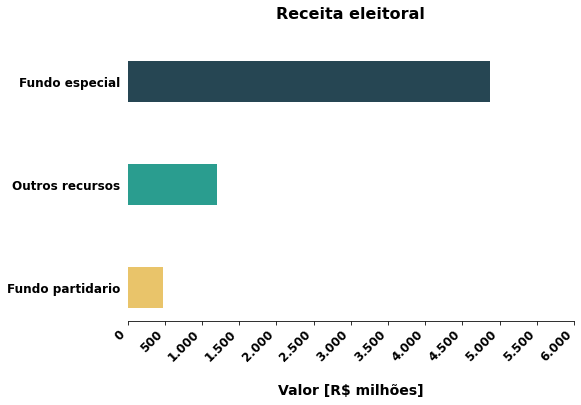

In [30]:
# plota grafico do valor de cada tipo de receita na campanha
receitas_tipo_df = receitas_df.groupby('DS_FONTE_RECEITA')['VR_RECEITA'].sum().sort_values()

index = [idx.lower().capitalize() for idx in list(receitas_tipo_df.index)]
values = receitas_tipo_df.values/1e6

xticks = list(range(0,6500,500))
x = [format(number,',d') for number in xticks]
xf = [num.replace(',','.') for num in x]

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1, 1, 1)

ax.barh(index, values, height = 0.4, color = ['#e9c46a', '#2a9d8f', '#264653'])

plt.title("Receita eleitoral por tipo", fontsize = 16.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

plt.xlabel("Valor [R$ milhões]", fontsize = 14.0, fontweight = 'bold')
plt.xticks(ticks = xticks, labels = xf, fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')

# ajuste de espaço entre eixo e titulo do eixo
ax.xaxis.labelpad = 20

# retira as linhas de caixa
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.tick_params(left=False)

plt.show()

### Receitas por partido

In [31]:
# agrupa as receitas por partido
partidos_lista = receitas_df['SG_PARTIDO'].unique().tolist()

filt_partidos_receitas = {inc: receitas_df.loc[receitas_df['DS_FONTE_RECEITA'] == inc] for inc in origem_receitas}

partidos_receitas_dic = {inc: df.groupby('SG_PARTIDO')['VR_RECEITA'].sum().sort_values(ascending=True) for inc, df in filt_partidos_receitas.items()}

In [32]:
partidos_lista_df = pd.DataFrame(index=partidos_lista, columns=origem_receitas)

for col in partidos_lista_df.columns:
    for idx in partidos_lista_df.index:
        
        if idx not in partidos_receitas_dic[col].index:
            
            partidos_lista_df.at[idx,col] = 0
            
        else:
            
            partidos_lista_df.at[idx,col] = partidos_receitas_dic[col][idx]/1e6

partidos_lista_df['TOTAL'] = partidos_lista_df.sum(axis=1).values
partidos_lista_df.sort_values(by=['TOTAL'], inplace=True)
partidos_lista_df

,OUTROS RECURSOS,FUNDO ESPECIAL,FUNDO PARTIDARIO,TOTAL
PCB,0.28334,0.02462,0,0.307960
PCO,0,0.680988,0.005,0.685988
UP,0.114833,2.311787,0,2.426620
PSTU,0.38285,3.088323,0.005,3.476174
PMB,4.100779,2.439564,0.015847,6.556189
PRTB,9.594881,2.111875,0.068755,11.775512
DC,3.262772,9.317538,0.087151,12.667460
AGIR,4.671172,19.420459,0.238,24.329632
PMN,6.153387,24.132651,0.110514,30.396552
PV,13.506474,46.421729,0.525727,60.453930


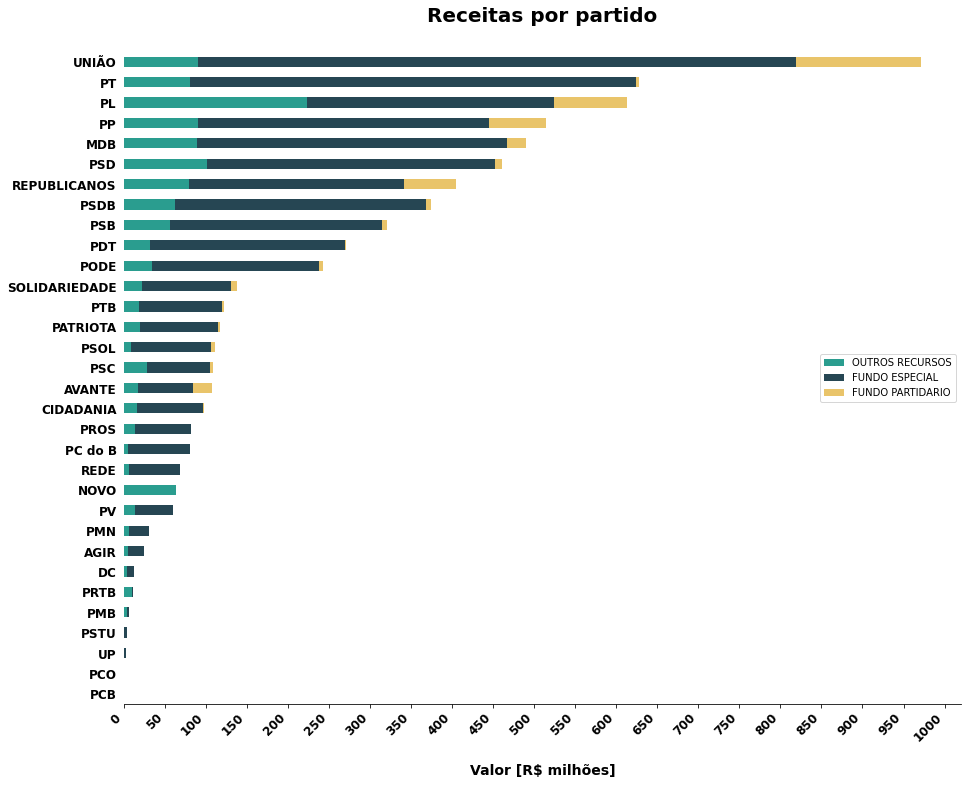

In [51]:
#plot
ax = partidos_lista_df[list(partidos_lista_df.columns)[:-1]].plot(kind='barh',
                                                    stacked=True,
                                                    color=['#2a9d8f', '#264653', '#e9c46a'],
                                                    figsize=[15, 12]
                                                   )
plt.title("Receitas por partido", fontsize = 20.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

plt.xlabel("Valor [R$ milhões]", fontsize = 14.0, fontweight = 'bold')
plt.xticks(list(range(0,1050,50)), fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')

# adjust space between label and axis
ax.xaxis.labelpad = 20

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.tick_params(left=False)

plt.legend(loc="center right")
plt.show()

### Despesa por Deputado Federal eleito

In [52]:
# cargos e receitas dos partidos originadas por deputados
cargos = receitas_df['DS_CARGO'].unique().tolist()
depfed_receitas_df = receitas_df.loc[receitas_df['DS_CARGO'] == 'Deputado Federal']
depfed_receitas_partidos = depfed_receitas_df.groupby('SG_PARTIDO')['VR_RECEITA'].sum().sort_values(ascending=True)

In [53]:
# numero de deputados federais eleitos por partido
depfed_eleitos_partidos = eleitos_df.groupby('SG_PARTIDO')['SG_PARTIDO'].count().sort_values(ascending=True)

In [54]:
# dataframe com receita total por deputado federal eleito e numero de deputados eleitos por partido
depfed_receita_eleitos_ratio_df = pd.DataFrame(index=partidos_lista, columns=['total_income_elected_ratio'])

for col in depfed_receita_eleitos_ratio_df.columns:
    for idx in depfed_receita_eleitos_ratio_df.index:
        
        if idx not in depfed_eleitos_partidos.index:
            
            depfed_receita_eleitos_ratio_df.at[idx,col] = 0
            
        else:
            
            depfed_receita_eleitos_ratio_df.at[idx,col] = (depfed_receitas_partidos[idx]/1e3)/depfed_eleitos_partidos[idx]

depfed_receita_eleitos_ratio_df.sort_values(by=['total_income_elected_ratio'], inplace=True)

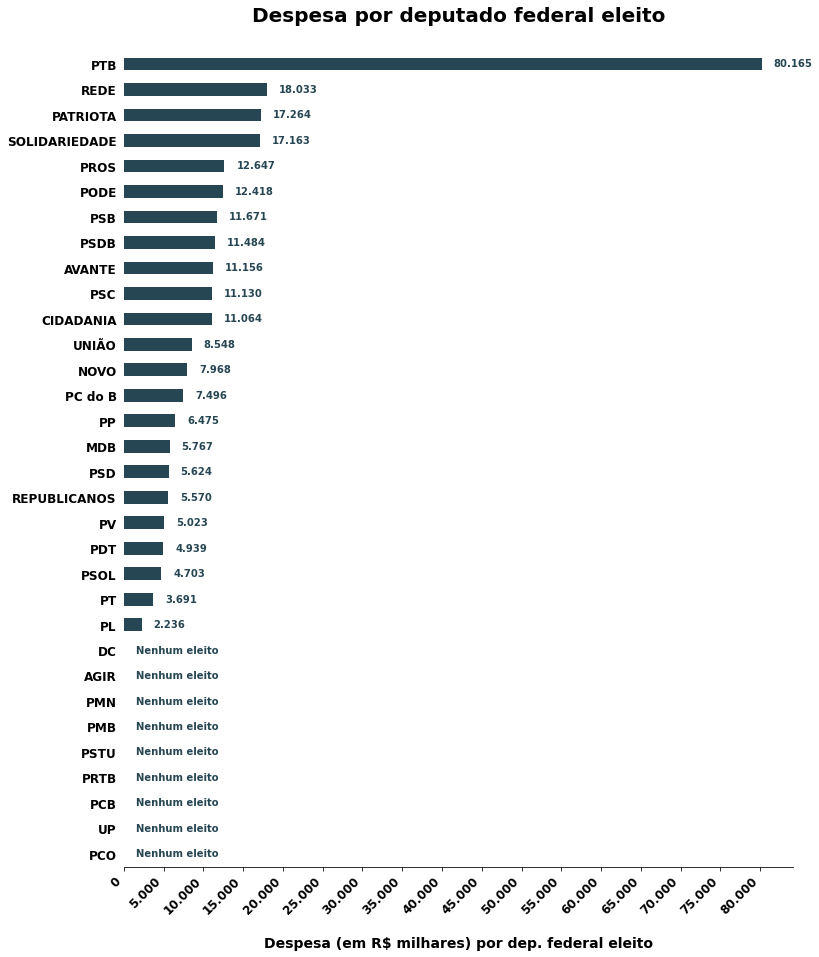

In [55]:
# plot
ax = depfed_receita_eleitos_ratio_df[list(depfed_receita_eleitos_ratio_df.columns)].plot(kind='barh',
                                                    stacked=True,
                                                    color=['#264653'],
                                                    figsize=[12, 15],
                                                    legend=None
                                                   )
plt.title("Despesa por deputado federal eleito", fontsize = 20.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

xticks = list(range(0,85000,5000))
x = [format(number,',d') for number in xticks]
xf = [num.replace(',','.') for num in x]

plt.xlabel("Despesa (em R$ milhares) por dep. federal eleito", fontsize = 14.0, fontweight = 'bold')
plt.xticks(ticks = xticks, labels = xf, fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')


# put labels values on top of bars
y = [int(round(i, 0)) for i in list(depfed_receita_eleitos_ratio_df['total_income_elected_ratio'])]

yy = [format(number,',d') for number in y]
yf = [num.replace(',','.') for num in yy]

for i in range(9):
    yf[i] = 'Nenhum eleito'
   
for i, v in enumerate(y):
    ax.text(v + 1500, i - 0.1, yf[i], color='#264653', fontweight='bold')

# adjust space between label and axis
ax.xaxis.labelpad = 20

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.tick_params(left=False)

plt.show()

### Origem das depesas eleitorais

In [57]:
# origem de despesas
despesas_origem_lista = despesas_df['DS_ORIGEM_DESPESA'].unique().tolist()
despesas_origem_lista[:10]

['Atividades de militância e mobilização de rua',
 'Serviços prestados por terceiros',
 'Diversas a especificar',
 'Alimentação',
 'Doações financeiras a outros candidatos/partidos',
 'Cessão ou locação de veículos',
 'Despesa com Impulsionamento de Conteúdos',
 'Despesas com pessoal',
 'Locação/cessão de bens imóveis',
 'Serviços advocatícios']

In [59]:
# dataframe de despesas por origem
valor_despesas_origem = despesas_df.groupby('DS_ORIGEM_DESPESA')['VR_DESPESA_CONTRATADA'].sum().sort_values(ascending=True)
pct = valor_despesas_origem.values/valor_despesas_origem.sum()
despesas_origem_df = pd.DataFrame(index=list(valor_despesas_origem.index))

despesas_origem_df['VR_DESPESA_CONTRATADA'] = valor_despesas_origem.values
despesas_origem_df['PORCENTAGEM'] = pct

rest_sum = despesas_origem_df['VR_DESPESA_CONTRATADA'].sum() - despesas_origem_df.iloc[-10:,0].sum()
rest_pct =  1.0 - despesas_origem_df.iloc[-10:,1].sum()

lista = list(despesas_origem_df.columns)
newrow_dict = {lista[0]: rest_sum, lista[1]: rest_pct}

df2 = pd.DataFrame(newrow_dict, index=['Restante somado'])

trunc_despesas_origem_df = pd.concat([df2, despesas_origem_df.iloc[-10:, :]])
trunc_despesas_origem_df

,VR_DESPESA_CONTRATADA,PORCENTAGEM
Restante somado,8.796869e+08,0.148567
Doações financeiras a outros candidatos/partidos,1.683974e+08,0.028440
Cessão ou locação de veículos,2.061848e+08,0.034822
Serviços advocatícios,2.211334e+08,0.037346
Despesa com Impulsionamento de Conteúdos,3.205016e+08,0.054128
Publicidade por adesivos,3.985930e+08,0.067317
"Produção de programas de rádio, televisão ou vídeo",4.313736e+08,0.072853
Serviços prestados por terceiros,6.943953e+08,0.117273
Despesas com pessoal,7.088643e+08,0.119717
Atividades de militância e mobilização de rua,7.232803e+08,0.122152


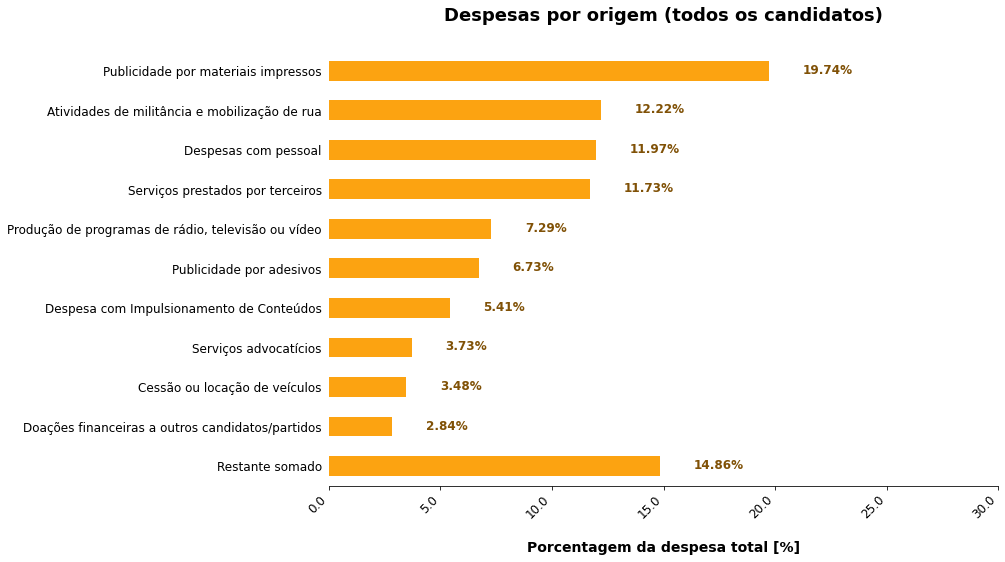

In [70]:
# plota
ax = trunc_despesas_origem_df.iloc[:, 1].plot(kind='barh',
                                          color=['#FCA311'],
                                          figsize=[12, 8],
                                          legend=None
                                          )

plt.title("Despesas por origem (todos os candidatos)", fontsize = 18.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0)

xticks = np.linspace(0, 0.3, num=7).tolist()
xf = [str(round(i*100,1)) for i in xticks]

plt.xlabel("Porcentagem da despesa total [%]", fontsize = 14.0, fontweight = 'bold')
plt.xticks(ticks = xticks, labels = xf, fontsize = 12.0, rotation=45, ha="right")


# coloca valores na frente das barras
y = list(trunc_despesas_origem_df.iloc[:, 1])
yf = [str(round(i*100, 2)) + "%" for i in y]
   
for i, v in enumerate(y):
    ax.text(v + 0.015, i - 0.07, yf[i], color='#805106', fontsize = 12.0, fontweight='bold')

    
# ajusta espaço entre eixo e o label
ax.xaxis.labelpad = 20

# retira linhas de caixa
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.tick_params(left=False)

plt.show()

### Relação receitas de campanha e resultado final

In [71]:
deputado_receitas = depfed_receitas_df.groupby('SQ_CANDIDATO')['VR_RECEITA'].sum().sort_values(ascending=True).iloc[-513:]

top_513_receitas_lista = list(deputado_receitas.index)
# top_513_receitas_lista

In [72]:
deputados_eleitos_lista = eleitos_df['SQ_CANDIDATO'].tolist()
# deputados_eleitos_lista

In [75]:
intersecao = set(top_513_receitas_lista).intersection(set(deputados_eleitos_lista))
print("Número de Dep. Federais eleitos que estão no grupo dos 513 candidatos com a maior receita de campanha: ", len(intersecao))
print("Em % do total de Dep. Federais eleitos: " + str(round(len(intersecao)*100/len(deputados_eleitos_lista),2)) + "%")

Número de Dep. Federais eleitos que estão no grupo dos 513 candidatos com a maior receita de campanha:  268
Em % do total de Dep. Federais eleitos: 52.24%


### Gênero

In [76]:
# genero %
genero_cand_df = (candidatos_df['DS_GENERO'].value_counts()/len(candidatos_df['DS_GENERO'])).sort_values(ascending=True)

In [77]:
# dataframe com gênero
eleitos_df['DS_GENERO'] = np.nan

for i in eleitos_df.index:
    for ii in candidatos_df.index:
        
        if eleitos_df.at[i, 'SQ_CANDIDATO'] == candidatos_df.at[ii, 'SQ_CANDIDATO']:
            
            eleitos_df.at[i, 'DS_GENERO'] = candidatos_df.at[ii, 'DS_GENERO']

genero_eleitos_df = (eleitos_df['DS_GENERO'].value_counts()/len(eleitos_df['DS_GENERO'])).sort_values(ascending=True)


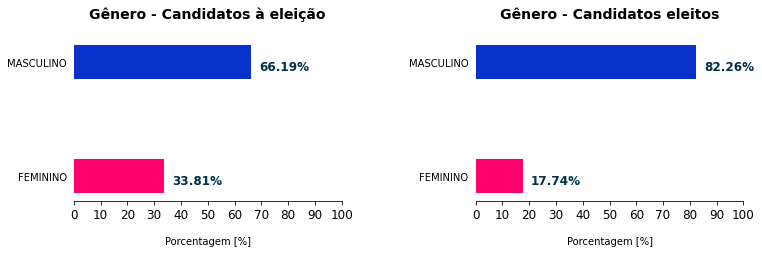

In [80]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# Plota todos candidatos
axs[0].barh(genero_cand_df.index, genero_cand_df.values, height=0.3, color=['#FF006E','#0931CC'])
axs[0].set_title('Gênero - Candidatos à eleição', fontsize = 14.0, fontweight = 'bold', pad=20)

# Plota candidatos eleitos
axs[1].barh(genero_eleitos_df.index, genero_eleitos_df.values, height=0.3, color=['#FF006E','#0931CC'])
axs[1].set_title('Gênero - Candidatos eleitos', fontsize = 14.0, fontweight = 'bold', pad=20)


# define xticks
xticks = np.linspace(0, 1.0, num=11).tolist()
xf = [str(int(i*100)) for i in xticks]

# define texto das barras
y_cand = genero_cand_df.values.tolist()
yf_cand = [str(round(i*100, 2)) + "%" for i in y_cand]

y_elect = genero_eleitos_df.values.tolist()
yf_elect = [str(round(i*100, 2)) + "%" for i in y_elect]

for i, v in enumerate(y_cand):
    axs[0].text(v + 0.03, i - 0.07, yf_cand[i], color='#003049', fontsize = 12.0, fontweight='bold')

for i, v in enumerate(y_elect):
    axs[1].text(v + 0.03, i - 0.07, yf_elect[i], color='#003049', fontsize = 12.0, fontweight='bold')    
    
# aplica xticks e spines
for ax in axs.flat:
    
    ax.set_xticks(ticks = xticks, labels = xf, fontsize = 12.0)
    ax.set(xlabel = 'Porcentagem [%]')
    
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.tick_params(left=False)

plt.show() 

### Cor ou raça


In [81]:
# cor/raca %
cor_raca_cand_df = (candidatos_df['DS_COR_RACA'].value_counts()/len(candidatos_df['DS_COR_RACA'])).sort_values(ascending=True)

In [82]:
# insere o campo cor/raca no dataframe de candidatos eleitos
eleitos_df['DS_COR_RACA'] = np.nan

for i in eleitos_df.index:
    for ii in candidatos_df.index:
        
        if eleitos_df.at[i, 'SQ_CANDIDATO'] == candidatos_df.at[ii, 'SQ_CANDIDATO']:
            
            eleitos_df.at[i, 'DS_COR_RACA'] = candidatos_df.at[ii, 'DS_COR_RACA']

cor_raca_eleitos_df = (eleitos_df['DS_COR_RACA'].value_counts()/len(eleitos_df['DS_COR_RACA'])).sort_values(ascending=True)
            

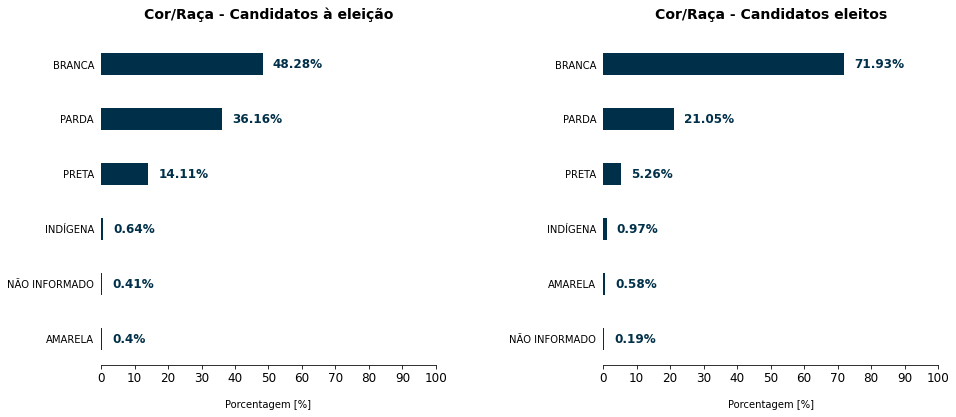

In [83]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.5)

axs[0].barh(cor_raca_cand_df.index, cor_raca_cand_df.values, height=0.4, color=['#003049'])
axs[0].set_title('Cor/Raça - Candidatos à eleição', fontsize = 14.0, fontweight = 'bold', pad=20)

axs[1].barh(cor_raca_eleitos_df.index, cor_raca_eleitos_df.values, height=0.4, color=['#003049'])
axs[1].set_title('Cor/Raça - Candidatos eleitos', fontsize = 14.0, fontweight = 'bold', pad=20)

# define xticks
xticks = np.linspace(0, 1.0, num=11).tolist()
xf = [str(int(i*100)) for i in xticks]

# define texto das barras
y_cand = cor_raca_cand_df.values.tolist()
yf_cand = [str(round(i*100, 2)) + "%" for i in y_cand]

y_elect = cor_raca_eleitos_df.values.tolist()
yf_elect = [str(round(i*100, 2)) + "%" for i in y_elect]

for i, v in enumerate(y_cand):
    axs[0].text(v + 0.03, i - 0.07, yf_cand[i], color='#003049', fontsize = 12.0, fontweight='bold')

for i, v in enumerate(y_elect):
    axs[1].text(v + 0.03, i - 0.07, yf_elect[i], color='#003049', fontsize = 12.0, fontweight='bold')    
    
# aplica xticks e spines
for ax in axs.flat:
    
    ax.set_xticks(ticks = xticks, labels = xf, fontsize = 12.0)
    ax.set(xlabel = 'Porcentagem [%]')
    
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.tick_params(left=False)

plt.show() 

### Idade

In [84]:
numero_candidatos = len(candidatos_df['NR_IDADE_DATA_POSSE'].value_counts())

eleitos_df['NR_IDADE_DATA_POSSE'] = np.nan

for i in eleitos_df.index:
    for ii in candidatos_df.index:
        
        if eleitos_df.at[i, 'SQ_CANDIDATO'] == candidatos_df.at[ii, 'SQ_CANDIDATO']:
            
            eleitos_df.at[i, 'NR_IDADE_DATA_POSSE'] = candidatos_df.at[ii, 'NR_IDADE_DATA_POSSE']

eleitos_df['NR_IDADE_DATA_POSSE'] = eleitos_df['NR_IDADE_DATA_POSSE'].astype(np.int32)

numero_eleitos = len(eleitos_df['NR_IDADE_DATA_POSSE'].value_counts())


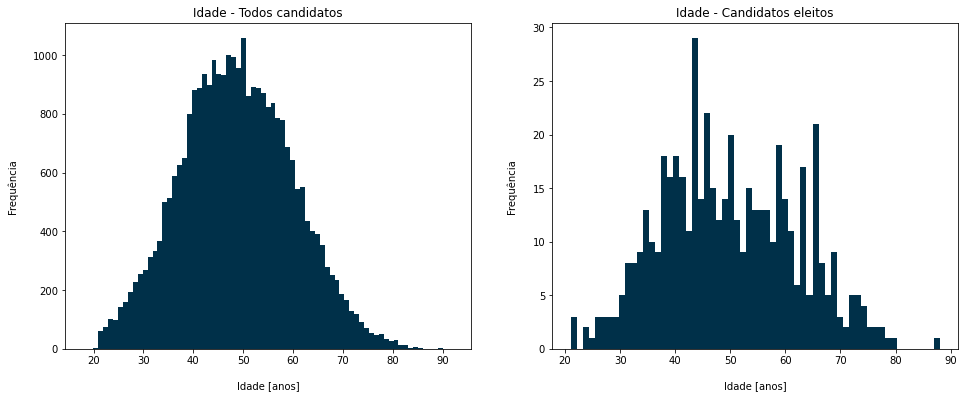

In [85]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].hist(candidatos_df['NR_IDADE_DATA_POSSE'], bins=numero_candidatos + 1, alpha=1.0, color=['#003049'])
axs[0].set_title('Idade - Todos candidatos')

axs[1].hist(eleitos_df['NR_IDADE_DATA_POSSE'], bins=numero_eleitos + 1, alpha=1.0, color=['#003049'])
axs[1].set_title('Idade - Candidatos eleitos')

for ax in axs.flat:
    ax.set(xlabel = 'Idade [anos]', ylabel = 'Frequência')
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15

plt.show() 

In [86]:
len(candidatos_df.loc[candidatos_df['DS_CARGO'] == "DEPUTADO FEDERAL"]['SQ_CANDIDATO'].unique().tolist())

10624

In [87]:
len(receitas_df.loc[receitas_df['DS_CARGO'] == "Deputado Federal"]['SQ_CANDIDATO'].unique().tolist())

9182